# <font color = purple>SRIPARNA BHATTACHARJEE </font>
# <font color = purple>TASK 2 : Predicting the percentage of scores of a student based on the number of study hours </font>


In [23]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [16]:
# read the data
    
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data has been imported successfully.")
print(data.head(8))

#convert into numpy arrays
    
hrs = data['Hours'].to_numpy()  
scr = data['Scores'].to_numpy()

#reshaping my data set
hrs= hrs.reshape(-1,1)
scr= scr.reshape(-1,1)

Data has been imported successfully.
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60


# <font color = purple> Exploring the data for better understanding  </font>

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


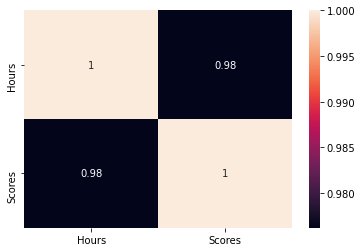

In [20]:
# ploting a heatmap to better understand the data
sns.heatmap(data.corr(), annot=True)
print(data.corr())

# <font color = purple> Plotting the data on a scatterplot </font> #

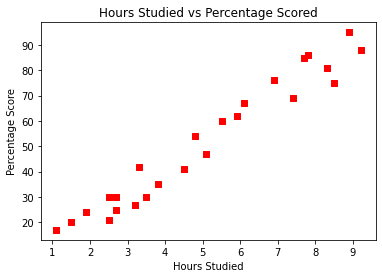

So clearly we observe a high positive correlation between Hours studied and percentage of Scores. The correlation is approximately 0.97 which is close to 1. 


In [21]:
#plot the data 


plt.scatter(hrs,scr)
plt.scatter(hrs, scr, color='red', marker='s')
plt.title('Hours Studied vs Percentage Scored')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

print("So clearly we observe a high positive correlation between Hours studied and percentage of Scores. The correlation is approximately 0.97 which is close to 1. ")


# <font color = purple>In order to perform a Linear Regression algorithm to this problem we devide the dataset into two subsets . Training Set and Test set . For this we use scikit learn.</font>


In [7]:
#devide the data into training and test set. We import train_test_split from sklearn.model_selection 
hrs_tr, hrs_te, scr_tr, scr_te = train_test_split(hrs, scr, test_size = 0.2, random_state = 0 )
print(hrs_tr.shape, scr_tr.shape,hrs_te.shape,scr_te.shape)

(20, 1) (20, 1) (5, 1) (5, 1)


## <font color = purple>Apply Linear Regression </font>

In [8]:
# Now we need to train our training set data

linreg = LinearRegression()
linreg.fit(hrs_tr, scr_tr)


coef= linreg.coef_ 
intercept= linreg.intercept_

print('Coefficient : ', coef)

print("Intercept : ", intercept)

print(" ")
print("Training Complete.")

Coefficient :  [[9.91065648]]
Intercept :  [2.01816004]
 
Training Complete.


## <font color = purple>Intercept = 2.02 </font>
## <font color = purple>Slope = 9.91 </font>

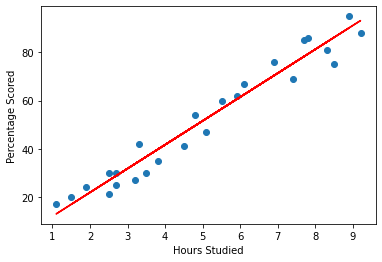

In [9]:
# plot the regression line 

regression_line = intercept + coef*hrs

plt.scatter(hrs, scr)
plt.plot(hrs, regression_line, color='red')
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Scored")
plt.show()



In [10]:
#predict using test data set
hrs_te = hrs_te.reshape(-1,1)
scr_hat = linreg.predict(hrs_te)

print(" So we have our predicted values for Scores.")
print(scr_hat)

 So we have our predicted values for Scores.
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


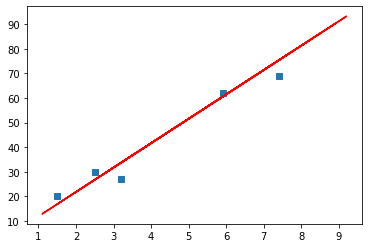

In [11]:
#plotting the line for our test data
plt.scatter(hrs_te, scr_te, marker = 's')
plt.plot(hrs, regression_line, color='r')
plt.show()

# <font color = purple>Compare the Actual Scores with that of Predicted Scores </font>

In [12]:
# we can compare the actual values of scores with that of predicted valuesDATA = pd.DataFrame({'Actual Score': scr_te, 'Predicted Score': scr_hat})  
DATA = pd.DataFrame({"Actual_Score" : scr_te[:,0], "Predicted_Score" : scr_hat[:,0]})
DATA



,Actual_Score,Predicted_Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#  <font color = purple> What will be the predicted value of score if a student studies for 9.25 hrs/ day? </font>
  
 



In [13]:
# value of score when hours studied is 9.25 hrs/day

predicted_score = linreg.predict([[9.25]])
print('Score of student who studied for 9.25 hours a day is',predicted_score)


Score of student who studied for 9.25 hours a day is [[93.69173249]]


# <font color = purple> Model Evaluation </font>

In [14]:
# calculating the mean squared error
from sklearn import metrics
r_2 = metrics.r2_score(scr_te, scr_hat)
MSE = metrics.mean_squared_error(scr_te, scr_hat)
MAE = metrics.mean_absolute_error(scr_te, scr_hat)
print("R_Square :" , r_2 )
print('Mean Squared Error:', 
      MSE) 
print('Mean Absolute Error:', 
      MAE)


R_Square : 0.9454906892105355
Mean Squared Error: 21.598769307217413
Mean Absolute Error: 4.18385989900298


# <font color = purple>So our model fits the data 94.5% .</font>